In [1]:
### Init network Build
import numpy as np
from pathlib import Path
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display
import pandas as pd
from osgeo import gdal
import keras

In [2]:
tif_list = [f for f in Path('../sample_data/sample2/').iterdir() if '.tif' in str(f)]
print(len(tif_list))
tif_list

50


[PosixPath('../sample_data/sample2/12021_SAW-2019-00158_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12004_SAW-2018-01975_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12001_SAW-2018-01916_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/116_LRB-2015-01132_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/109_LRB-2015-00978_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/101_LRB-2015-00884_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12003_SAW-2018-01959_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12012_SAW-2018-02087_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12013_SAW-2018-02154_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12020_SAW-2019-00154_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/12007_SAW-2018-02008_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/114_LRB-2015-01117_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/111_LRB-2015-01054_srtm_hires.tif'),
 PosixPath('../sample_data/sample2/1000_LRE-2019

In [3]:
#Order_for_training = ['_mndvi_lores_', ''

In [4]:
def unpack_Tiffs(list_of_tiffs):
    layer_list = []
    for t in list_of_tiffs:
        # open the geotiff
        p = gdal.Open(str(t))
        channels = p.RasterCount
        print(p.GetDescription())
        
        # iterate through rasters and add each to the list of layer_list
        layer_list += [np.array(p.GetRasterBand(i).ReadAsArray()) for i in range(1,channels+1)] 
        
        
    return layer_list
xx = np.array(unpack_Tiffs(tif_list))
print(xx.shape)
#xx = xx.reshape(256,256,15)
print(xx.shape)

../sample_data/sample2/12021_SAW-2019-00158_srtm_hires.tif
../sample_data/sample2/12004_SAW-2018-01975_srtm_hires.tif
../sample_data/sample2/12001_SAW-2018-01916_srtm_hires.tif
../sample_data/sample2/116_LRB-2015-01132_srtm_hires.tif
../sample_data/sample2/109_LRB-2015-00978_srtm_hires.tif
../sample_data/sample2/101_LRB-2015-00884_srtm_hires.tif
../sample_data/sample2/12003_SAW-2018-01959_srtm_hires.tif
../sample_data/sample2/12012_SAW-2018-02087_srtm_hires.tif
../sample_data/sample2/12013_SAW-2018-02154_srtm_hires.tif
../sample_data/sample2/12020_SAW-2019-00154_srtm_hires.tif
../sample_data/sample2/12007_SAW-2018-02008_srtm_hires.tif
../sample_data/sample2/114_LRB-2015-01117_srtm_hires.tif
../sample_data/sample2/111_LRB-2015-01054_srtm_hires.tif
../sample_data/sample2/1000_LRE-2019-00318-120_srtm_hires.tif
../sample_data/sample2/12022_SAW-2019-00208_srtm_hires.tif
../sample_data/sample2/102_LRB-2015-00900_srtm_hires.tif
../sample_data/sample2/12008_SAW-2018-02030_srtm_hires.tif
../sam

IndexError: index 3 is out of bounds for axis 0 with size 3

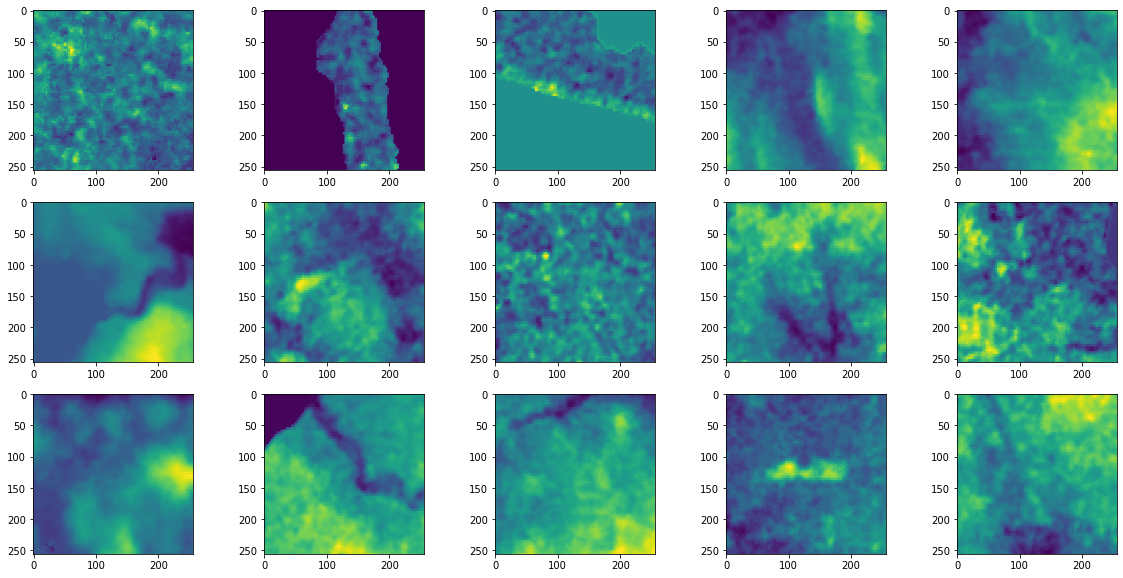

In [5]:
fig, ax = plt.subplots(3,5,figsize=(20,10)) 
i = 0
j = 0
for x in xx:
    ax[i,j].imshow(x)
    j += 1
    if j == 5: 
        j = 0
        i += 1

In [34]:
## develop input splitter
from keras.applications.vgg16 import VGG16
vgg16_model = VGG16(include_top=False, weights='imagenet', input_shape=(256,256, 3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [35]:
test_input = np.random.rand(256,256,3)
test_input = test_input.reshape(1, 256,256, 3)
print(test_input.shape)
vgg16_model.predict(test_input)

(1, 256, 256, 3)


array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.9637563 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.737109  , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.810797  , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.8072672 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.7071745 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.6988463 , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          1.0080565 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.883754  , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.92733973, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.8760009 , 0. 

In [36]:
for i in range(2):
    s = np.random.rand(256,256,6)[:,:, i*3:3*(i+1)].shape
    print(s)

(256, 256, 3)
(256, 256, 3)


In [63]:
from keras.layers import Dense, Concatenate, Input, Lambda, Flatten, Softmax
from keras.models import Model, Sequential

num_channels = 6
input = Input(shape=(256,256, num_channels))

branch_outputs = []

# loop for however many branches you want to use.  (each branch needs 3 channel depth)
for i in [0,3]:
    # create looping so that vgg16 model input is created ie 256,256,3
    print(input.shape)
    out = Lambda(lambda x: x[:,:,:,i:i+3])(input)
    print(out.shape)
    
    # Setting up your layers in each branch: (currently each branch is identical architecture.)
    out = Sequential(vgg16_model)(out)   # use pretrained and loaded vgg16
    print(out.shape)
    out = Dense(10)(out)
    print(out.shape)
    out = Flatten()(out)
    print(out.shape)
    branch_outputs.append(out)

# Concatenating the branches outputs:
out = Concatenate()(branch_outputs)
print(out.shape)

# Add final dense layers and softmax
out = Dense(10)(out)
print(out.shape)
out = Dense(2)(out)
print(out.shape)
out = Softmax()(out)
print(out.shape)

(None, 256, 256, 6)
(None, 256, 256, 3)
(None, 8, 8, 512)
(None, 8, 8, 10)
(None, 640)
(None, 256, 256, 6)
(None, 256, 256, 3)
(None, 8, 8, 512)
(None, 8, 8, 10)
(None, 640)
(None, 1280)
(None, 10)
(None, 2)
(None, 2)


In [64]:
model = Model(inputs=input, outputs=out)   
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 256, 256, 6) 0                                            
__________________________________________________________________________________________________
lambda_50 (Lambda)              (None, 256, 256, 3)  0           input_40[0][0]                   
__________________________________________________________________________________________________
lambda_51 (Lambda)              (None, 256, 256, 3)  0           input_40[0][0]                   
__________________________________________________________________________________________________
sequential_34 (Sequential)      (None, 8, 8, 512)    14714688    lambda_50[0][0]                  
_______________________________________________________________________________________

In [66]:
test_input = np.random.rand(256,256,3)
test_input = test_input.reshape(1, 256,256, 3)
print(test_input.shape)
model.predict(test_input)

(1, 256, 256, 3)


ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [None, 256, 256, 0]


In [10]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)


ValueError: Keras Visualizer: Layer not supported for visualizing

In [41]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras import regularizers
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D, Lambda

from keras.applications.vgg16 import VGG16

In [7]:
import IPython
print(IPython.sys_info())

{'commit_hash': '2486838d9',
 'commit_source': 'installation',
 'default_encoding': 'ANSI_X3.4-1968',
 'ipython_path': '/usr/local/lib/python3.6/dist-packages/IPython',
 'ipython_version': '7.16.1',
 'os_name': 'posix',
 'platform': 'Linux-4.9.140-tegra-aarch64-with-Ubuntu-18.04-bionic',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'}


In [19]:
#vgg16 with top
vgg16_model = VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [40]:
base_model = Sequential(vgg16_model)
base_model.add(Dense(64, activation = 'relu'))
print(len(base_model.layers))
base_model.summary()

2
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
dense_16 (Dense)             (None, 8, 8, 64)          32832     
Total params: 14,747,520
Trainable params: 14,747,520
Non-trainable params: 0
_________________________________________________________________


In [35]:
#base_model.pop()
print(len(base_model.layers))
base_model.build()

1


In [36]:
base_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from collections import deque
from keras.activations import relu, linear
from keras.losses import mean_squared_error
from keras.optimizers import Adam
import tensorflow as tf

In [27]:
def build_model(den,lr):
    model = Sequential()
    #model.add(tf.keras.Input(shape=(6,6,2,)))
    #for layer in den:
    model.add(Conv2D(
                        filters = 12, 
                        kernel_size = (3,3),
                        strides = (1,1),
                        padding = 'valid',
                        activation = relu,
                        input_shape = (256,256,15)))#, data_format = 'channels_last'))
    model.add(Flatten())
    model.add(Dense(64, activation = relu))
    model.add(Dense(32, activation = relu))


    model.add(Dense(1, activation=linear))

    model.compile(loss=mean_squared_error,optimizer=Adam(lr=lr))
    print(model.summary())
    return model

In [28]:
mod1 = build_model(1,.002)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 12)      1632      
_________________________________________________________________
flatten_2 (Flatten)          (None, 774192)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                49548352  
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 49,552,097
Trainable params: 49,552,097
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
xx.dtype
if True in np.isnan(xx): print('true')
np.sum(np.isnan(xx))

true


1816

In [15]:
xx1 = np.nan_to_num(xx)

In [23]:
print(xx1.shape)
xx2 = xx1.reshape(1, 256,256, -1)
print(xx2.shape)

(15, 256, 256)
(1, 256, 256, 15)


In [24]:
mod1.predict(xx2)

array([[-0.65755415]], dtype=float32)

In [ ]:

spli
